# Regression Model Selection

## Importing the basic libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Load Dataset from Local Directory

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dataset.csv to dataset.csv


## Importing the dataset

**AT: Ambient Temperature (in °C)  |  
V: Exhaust Vacuum (in cm Hg)  |  
AP: Ambient Pressure (in millibar)  |  
RH: Relative Humidity (in %)  |  
PE: Net Hourly Electrical Energy Output (in MW)**

In [ ]:
dataset = pd.read_csv('dataset.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
ysvm = y.reshape(len(y),1)
print(ysvm)

[[463.26]
 [444.37]
 [488.56]
 ...
 [429.57]
 [435.74]
 [453.28]]


## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Importing Machine Learning Algorithms

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

## Initializing different Regression algorithms

In [ ]:
from sklearn.preprocessing import StandardScaler

modelLR  = LinearRegression()

poly_reg = PolynomialFeatures(degree = 4)
X_poly   = poly_reg.fit_transform(X_train)
modelPLR = LinearRegression()

modelRFR = RandomForestRegressor(n_estimators = 10, random_state = 0)

modelDTR = DecisionTreeRegressor(random_state = 0)

modelSVR = SVR(kernel = 'rbf')



### Training Regression algorithm

In [ ]:
modelLR.fit(X_train, y_train)
modelPLR.fit(X_poly, y_train)
modelRFR.fit(X_train, y_train)
modelDTR.fit(X_train, y_train)
modelSVR.fit(X_train, y_train)

SVR()

## Predicting the Test set for Validation

In [ ]:
modelLRy_pred  = modelLR.predict(X_test)
modelPLRy_pred = modelPLR.predict(poly_reg.transform(X_test))
modelRFRy_pred = modelRFR.predict(X_test)
modelDTRy_pred = modelDTR.predict(X_test)
modelSVRy_pred = modelSVR.predict(X_test)

## Evaluating the Model Performance

In [ ]:
from sklearn.metrics import r2_score
print("Linear Regression Accuracy: {}".format(r2_score(y_test, modelLRy_pred)))
print("Polynomial Regression Accuracy: {}".format(r2_score(y_test, modelPLRy_pred)))
print("Random Forest Regression Accuracy: {}".format(r2_score(y_test, modelRFRy_pred)))
print("Decision Treee Regression Accuracy: {}".format(r2_score(y_test, modelDTRy_pred)))
print("Support Vector Regression Accuracy: {}".format(r2_score(y_test, modelSVRy_pred)))

Linear Regression Accuracy: 0.9325315554761303
Polynomial Regression Accuracy: 0.945526154092757
Random Forest Regression Accuracy: 0.9615908334363876
Decision Treee Regression Accuracy: 0.922905874177941
Support Vector Regression Accuracy: 0.3818211045129358


**Model Prediction**

In [ ]:
AT=float(input("Enter the value of AT"))
V=float(input("Enter the value of Exhaust Vaccum(in cm Hg)"))
AP=float(input("Enter the value of Relative Humidity (in %)"))
RH=float(input("Enter the value of Relative Humidity (in %)"))
user_ip=([[AT,V,AP,RH]])
output=modelRFR.predict(user_ip)
print(output)

Enter the value of AT14.96
Enter the value of Exhaust Vaccum(in cm Hg)41.76
Enter the value of Relative Humidity (in %)1024.07
Enter the value of Relative Humidity (in %)73.17
[463.482]


**Data Visualization**

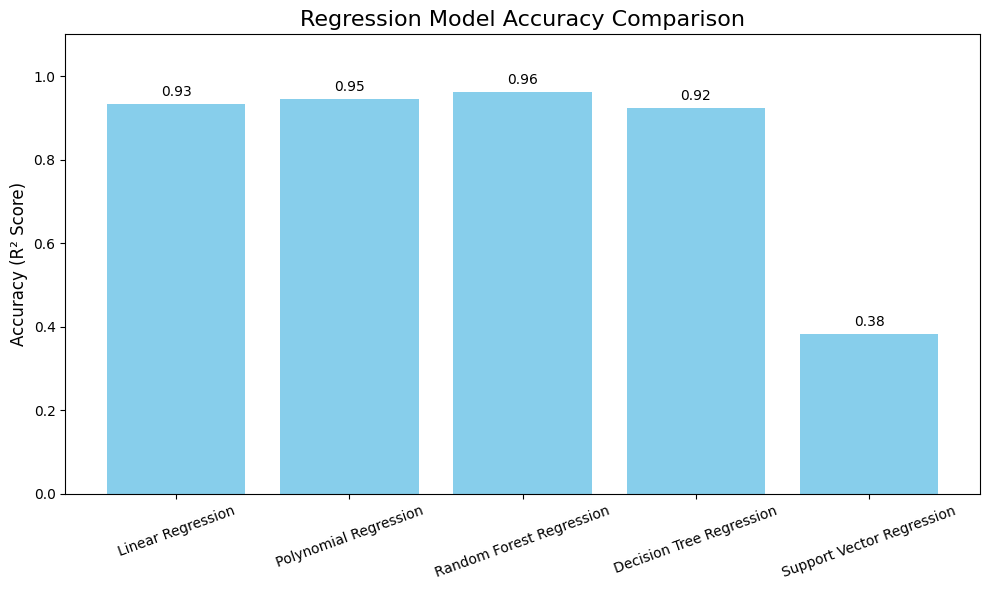

In [ ]:
import matplotlib.pyplot as plt

# Model names and corresponding accuracies
models = [
    'Linear Regression',
    'Polynomial Regression',
    'Random Forest Regression',
    'Decision Tree Regression',
    'Support Vector Regression'
]

accuracies = [
    0.9325315554761303,
    0.945526154092757,
    0.9615908334363876,
    0.922905874177941,
    0.3818211045129358
]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color='skyblue')
plt.ylim(0, 1.1)
plt.title('Regression Model Accuracy Comparison', fontsize=16)
plt.ylabel('Accuracy (R² Score)', fontsize=12)
plt.xticks(rotation=20)

# Adding value labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f"{yval:.2f}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()


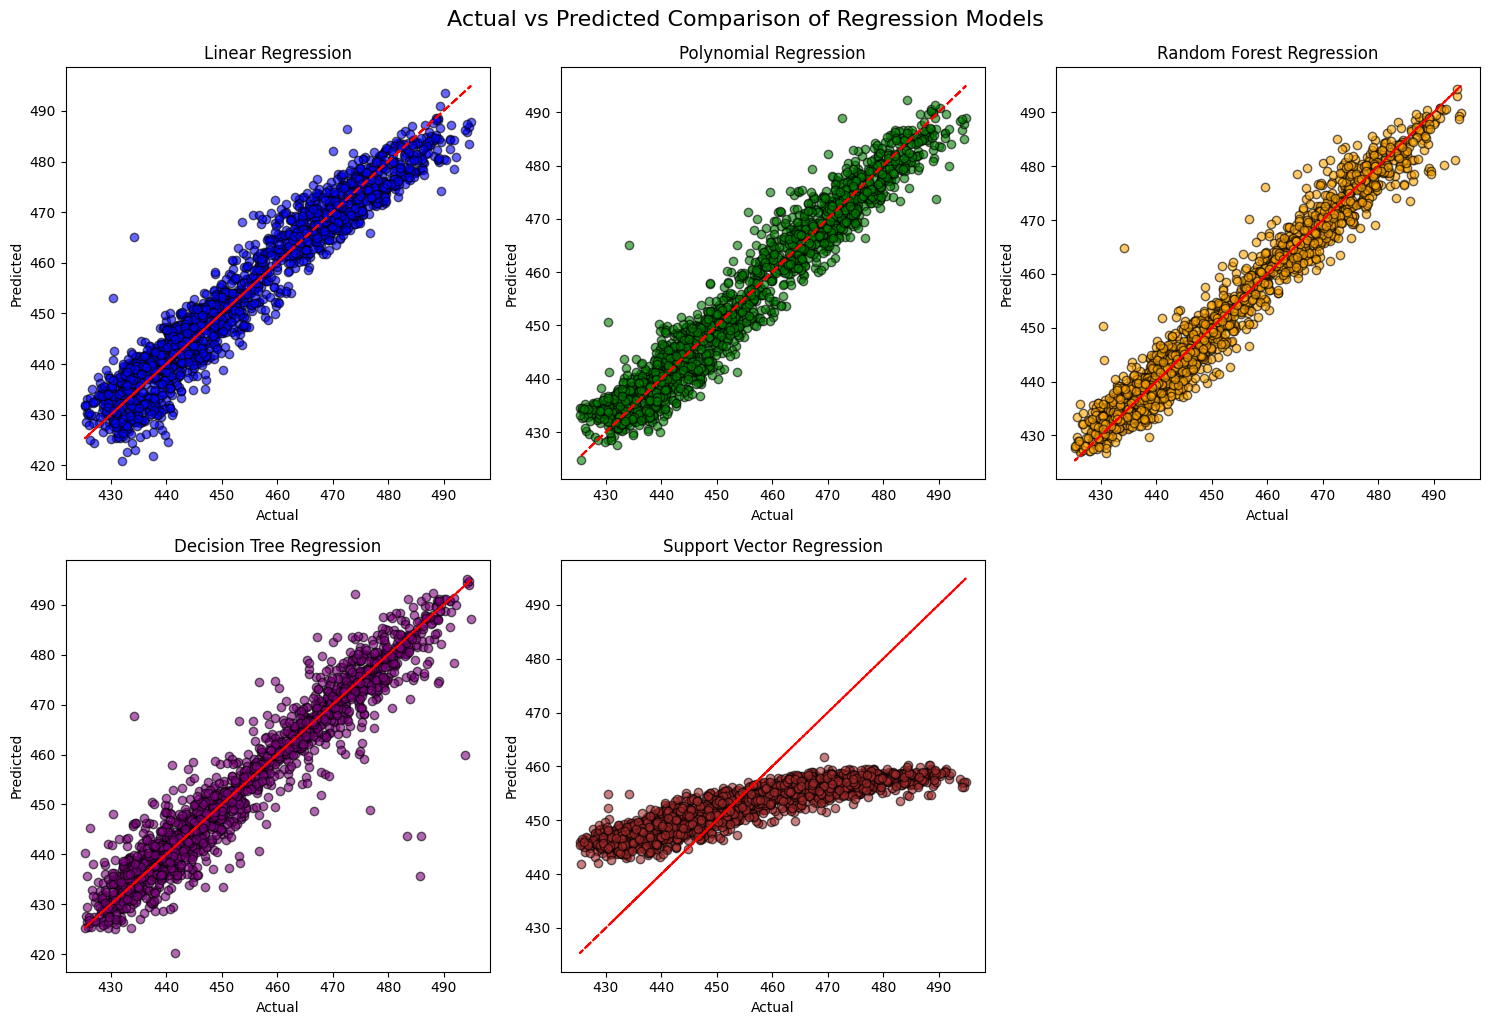

In [ ]:
import matplotlib.pyplot as plt

# Example: Replace these with your actual data
# y_test should be the same for all models
# y_preds should be the predicted values from each model

# These should be NumPy arrays or Pandas Series
# y_test = ...
# y_pred_linear = ...
# y_pred_poly = ...
# y_pred_rf = ...
# y_pred_dt = ...
# y_pred_svr = ...

# Set up subplots
plt.figure(figsize=(15, 10))

# Plot for Linear Regression
plt.subplot(2, 3, 1)
# Use the correctly named variable for linear regression predictions
plt.scatter(y_test, modelLRy_pred, color='blue', edgecolor='k', alpha=0.6)
plt.plot(y_test, y_test, color='red', linestyle='--')  # Perfect prediction line
plt.title('Linear Regression')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Plot for Polynomial Regression
plt.subplot(2, 3, 2)
# Use the correctly named variable for polynomial regression predictions
plt.scatter(y_test, modelPLRy_pred, color='green', edgecolor='k', alpha=0.6)
plt.plot(y_test, y_test, color='red', linestyle='--')
plt.title('Polynomial Regression')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Plot for Random Forest Regression
plt.subplot(2, 3, 3)
# Use the correctly named variable for random forest regression predictions
plt.scatter(y_test, modelRFRy_pred, color='orange', edgecolor='k', alpha=0.6)
plt.plot(y_test, y_test, color='red', linestyle='--')
plt.title('Random Forest Regression')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Plot for Decision Tree Regression
plt.subplot(2, 3, 4)
# Use the correctly named variable for decision tree regression predictions
plt.scatter(y_test, modelDTRy_pred, color='purple', edgecolor='k', alpha=0.6)
plt.plot(y_test, y_test, color='red', linestyle='--')
plt.title('Decision Tree Regression')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Plot for Support Vector Regression
plt.subplot(2, 3, 5)
# Use the correctly named variable for support vector regression predictions
plt.scatter(y_test, modelSVRy_pred, color='brown', edgecolor='k', alpha=0.6)
plt.plot(y_test, y_test, color='red', linestyle='--')
plt.title('Support Vector Regression')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.tight_layout()
plt.suptitle('Actual vs Predicted Comparison of Regression Models', fontsize=16, y=1.02)
plt.show()

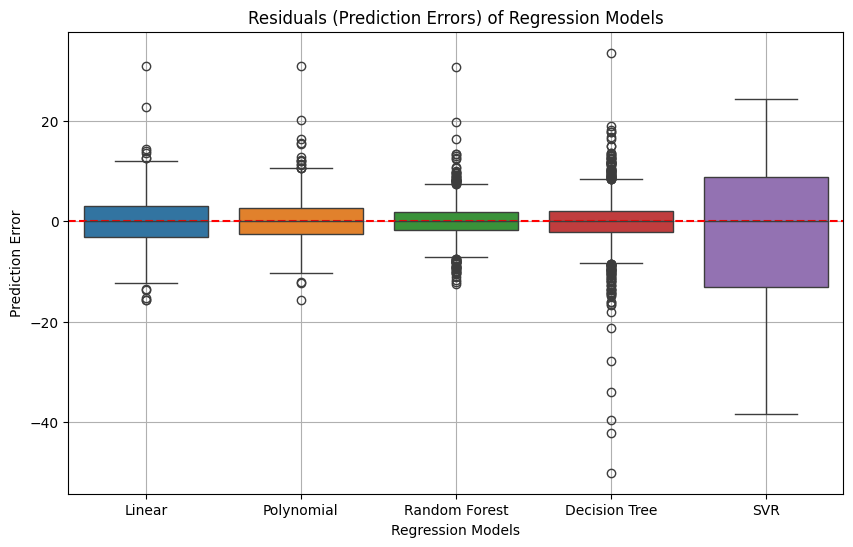

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Calculate residuals (errors)
errors = {
    # Use the actual variable names for the predictions
    'Linear': modelLRy_pred - y_test,
    'Polynomial': modelPLRy_pred - y_test,
    'Random Forest': modelRFRy_pred - y_test,
    'Decision Tree': modelDTRy_pred - y_test,
    'SVR': modelSVRy_pred - y_test
}

# Convert to DataFrame for Seaborn
df_errors = pd.DataFrame(errors)

# Plotting
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_errors)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals (Prediction Errors) of Regression Models')
plt.ylabel('Prediction Error')
plt.xlabel('Regression Models')
plt.grid(True)
plt.show()

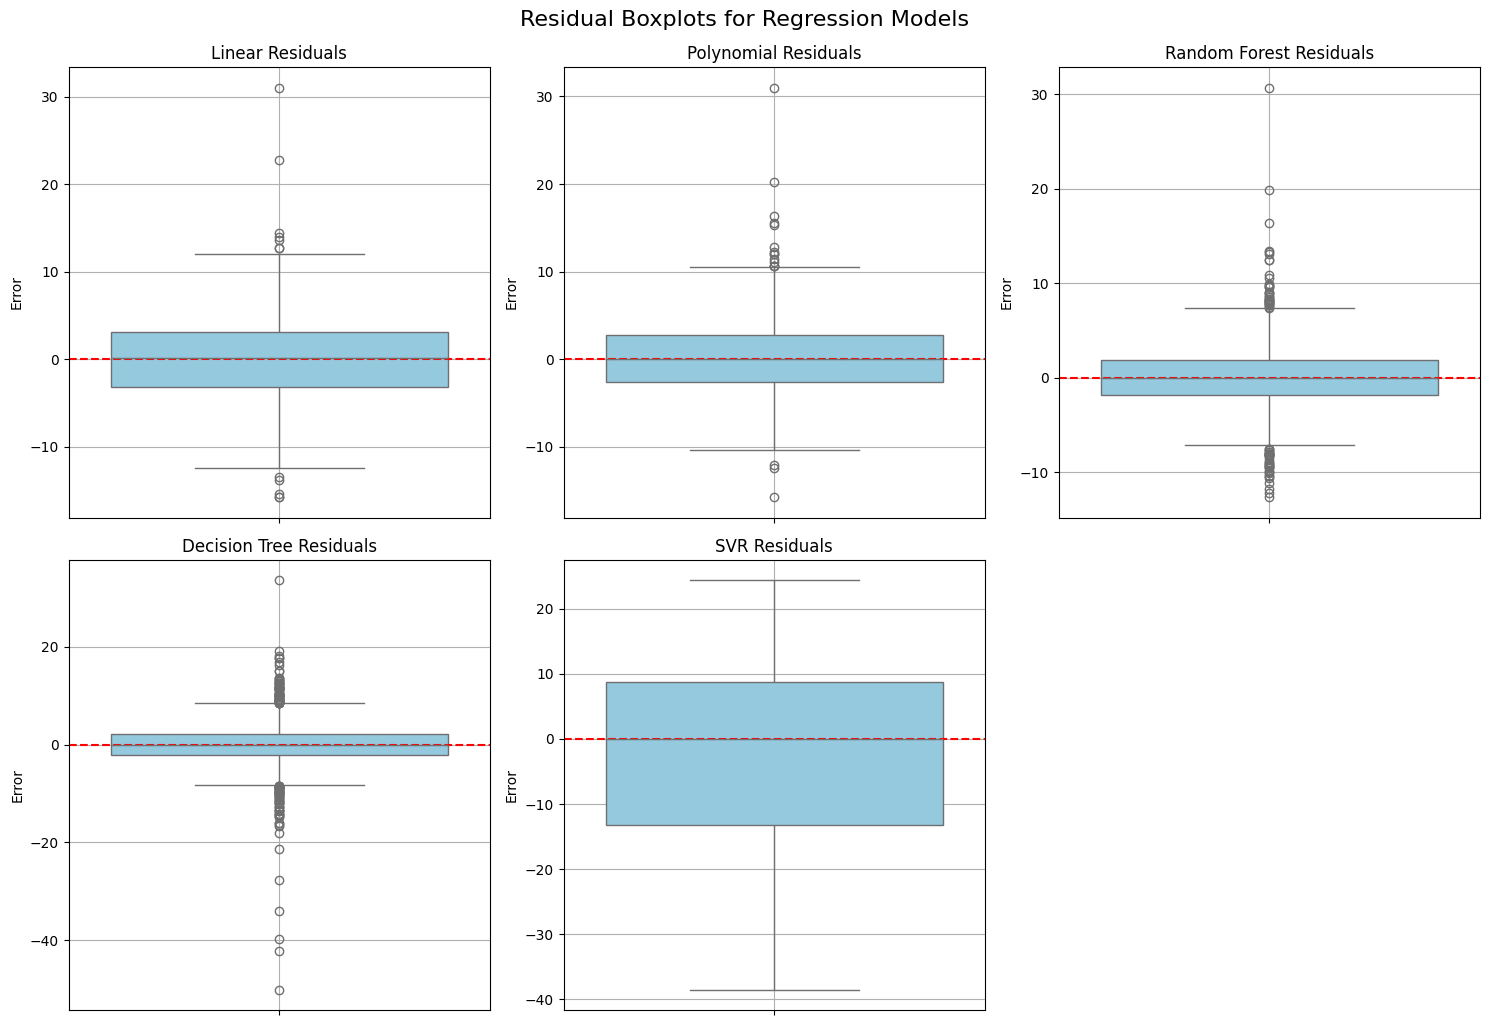

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Calculate residuals (errors)
residuals = {
    # Use the actual variable names for the predictions
    'Linear': modelLRy_pred - y_test,
    'Polynomial': modelPLRy_pred - y_test,
    'Random Forest': modelRFRy_pred - y_test,
    'Decision Tree': modelDTRy_pred - y_test,
    'SVR': modelSVRy_pred - y_test
}

# Set up subplots
plt.figure(figsize=(15, 10))

for i, (model, res) in enumerate(residuals.items(), 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=res, color='skyblue')
    plt.axhline(0, color='red', linestyle='--')
    plt.title(f'{model} Residuals')
    plt.ylabel('Error')
    plt.grid(True)

plt.tight_layout()
plt.suptitle('Residual Boxplots for Regression Models', fontsize=16, y=1.02)
plt.show()